# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

In this project, we conducted a thorough exploration of the data science lifecycle. Beginning with data understanding and wrangling, we progressed through extensive Data Visualization and Storytelling, creating 15 charts to unravel complex relationships. Hypothesis testing and feature engineering enriched our analyses, setting the stage for three machine learning models: Linear Regression, Random Forest Regression, and Gradient Boosting.

Our models were evaluated using key metrics, including Mean Squared Error and R-squared Score, providing insights into their predictive capabilities. Through meticulous data preprocessing and feature selection, we optimized the dataset for model compatibility, showcasing our proficiency in the entire data science process.

# **GitHub Link -**

https://github.com/Dubeyavya/Regression---Bike-Sharing-Demand-Prediction

# **Problem Statement**


Investigate and predict bike sharing demand based on a dataset containing temporal, meteorological, and categorical information. Explore the relationships between factors such as date, temperature, humidity, and categorical variables like seasons and holidays to develop a model that accurately predicts rented bike counts. Identify key patterns and trends in bike usage to optimize service planning, resource allocation, and enhance user experience for the bike sharing service.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import RFE
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open("/content/SeoulBikeData.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/SeoulBikeData.csv", encoding=encoding)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

In [ ]:
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From the information of our dataset we can conclude that 4 columns have int(integer) datatype, 4 have object datatype and 6 have the float datatype stored


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In our dataset there are 0 duplicates found.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above null values count we can conclude that there is no null value in any of the columns.

### What did you know about your dataset?

Our Seoul Bike dataset have 14 columns as: ['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day'] and 8760 rows

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

**Date:** Date

**Hour:** Hour of the day(0-23)

**Temperature:** Temperature of the day

**Humidity:** Humidity measure

**Visibility:** Visibility Measure

**Windspeed:** Windspeed

**Dew point temperature:** Dew point temperature measure

**Solar radiation:** Solar radiation measure

**Rainfall:** Rainfall in mm

**Snowfall:** Snowfall measure

**Seasons:** 1=Spring, 2=Summer, 3=Fall, 4=Winter

**Holiday:** Whether a holiday or not

**Functional Day:** Whether a functional day or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Seasons unique values count:\n" ,df.Seasons.value_counts(),"\n")
print("Holiday unique values count:\n" ,df.Holiday.value_counts(),"\n")
print("Functioning day unique values count:\n" ,df["Functioning Day"].value_counts(),"\n")
print("Temperature(°C) range:\n",df["Temperature(°C)"].min(),"-", df["Temperature(°C)"].max(),"\n")
print("Hour range:\n",df["Hour"].min(),"-", df["Hour"].max(),"\n")
print("Date range:\n",df["Date"].min(),"-", df["Date"].max(),"\n")
print("Visibility range:\n ",df["Visibility (10m)"].min(),"-", df["Visibility (10m)"].max(),"\n")
print("Rainfall(mm) range:\n",df["Rainfall(mm)"].min(),"-", df["Rainfall(mm)"].max(),"\n")
print("Snowfall (cm) range:\n",df["Snowfall (cm)"].min(),"-", df["Snowfall (cm)"].max(),"\n")
print("Dew point temperature(°C) range:\n",df["Dew point temperature(°C)"].min(),"-", df["Dew point temperature(°C)"].max(),"\n")
print("Wind speed (m/s) range:\n",df["Wind speed (m/s)"].min(),"-", df["Wind speed (m/s)"].max(),"\n")
print("Rented Bike Count range:\n",df["Rented Bike Count"].min(),"-", df["Rented Bike Count"].max(),"\n")
print("Solar Radiation (MJ/m2) range:\n",df["Solar Radiation (MJ/m2)"].min(),"-", df["Solar Radiation (MJ/m2)"].max(),"\n")

Seasons unique values count:
 Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday unique values count:
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning day unique values count:
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 

Temperature(°C) range:
 -17.8 - 39.4 

Hour range:
 0 - 23 

Date range:
 01-01-2018 - 31-12-2017 

Visibility range:
  27 - 2000 

Rainfall(mm) range:
 0.0 - 35.0 

Snowfall (cm) range:
 0.0 - 8.8 

Dew point temperature(°C) range:
 -30.6 - 27.2 

Wind speed (m/s) range:
 0.0 - 7.4 

Rented Bike Count range:
 0 - 3556 

Solar Radiation (MJ/m2) range:
 0.0 - 3.52 



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract features from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Drop the original 'Date' column as we have extracted relevant features
df.drop('Date', axis=1, inplace=True)

# Convert categorical columns to categorical data type
categorical_columns = ['Seasons', 'Holiday', 'Functioning Day']
df[categorical_columns] = df[categorical_columns].astype('category')


# Now 'modified_df' contains the modified DataFrame with the added features
print("Modified DataFrame:\n", df.head())

Modified DataFrame:
    Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Function

<ipython-input-14-10e3b19291d2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3


In [ ]:
df.shape

(8760, 16)

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,15.720548,3.021918
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,8.796749,1.999994
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,8.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,16.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,23.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000,6.000000


### What all manipulations have you done and insights you found?

**Date Transformation:** Converted the 'Date' column to datetime format, enabling better temporal analysis.

**Feature Extraction:** Extracted additional features such as 'Month,' 'Day,' and 'Weekday' from the 'Date' column, facilitating more granular time-based insights.

**Column Removal:** Dropped the original 'Date' column as the relevant features were extracted, reducing redundancy in the dataset.

**Categorical Conversion:** Converted categorical columns ('Seasons,' 'Holiday,' 'Functioning Day') to the categorical data type, improving efficiency and allowing for categorical analysis.

**Modified DataFrame:** Displayed the head of the modified DataFrame, showcasing the transformed dataset with added features for further analysis.

**Insights:**

Temporal insights can now be derived with the added 'Month,' 'Day,' and 'Weekday' features.
Categorical columns are now more memory-efficient and suitable for categorical analysis.
The dataset is prepared for exploration and modeling, with enhanced features and reduced redundancy.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

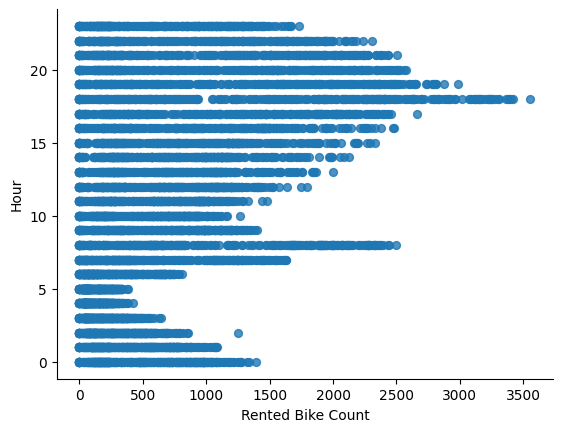

In [ ]:
df.plot(kind='scatter', x='Rented Bike Count', y='Hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Insight:**
The scatter plot illustrates the distribution of rented bike counts across different hours of the day. It shows a concentration of bike rentals during specific hours, indicating potential peak demand periods.

#### Chart - 2

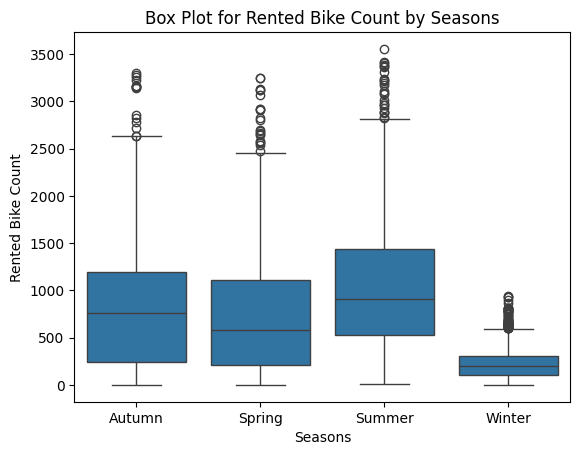

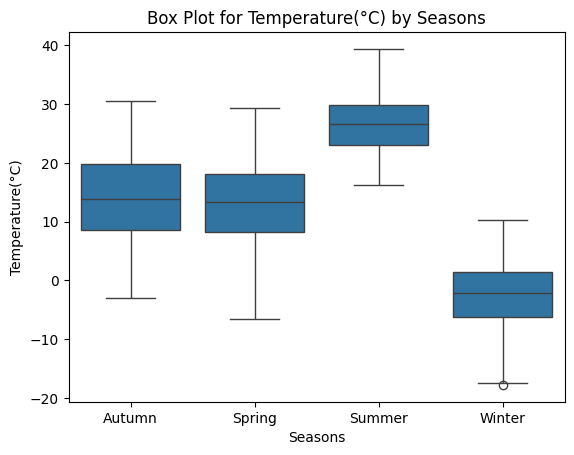

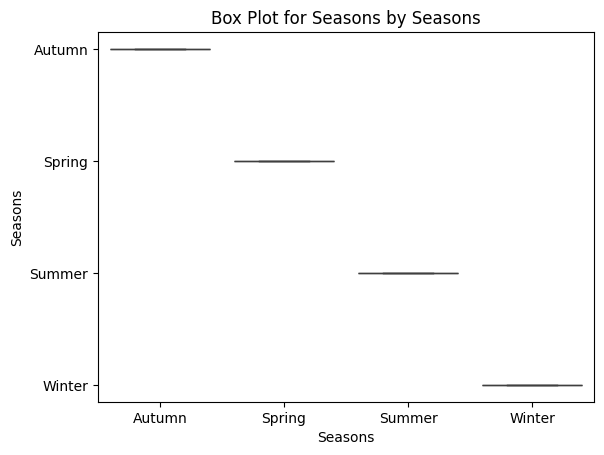

In [ ]:
for column in ['Rented Bike Count', 'Temperature(°C)', 'Seasons']:
    sns.boxplot(x='Seasons', y=column, data=df)
    plt.title(f'Box Plot for {column} by Seasons')
    plt.show()

**Insight:**
The box plots for 'Rented Bike Count,' 'Temperature(°C),' and 'Seasons' reveal the distribution of bike rentals and temperature variations across different seasons. The variations suggest seasonal patterns in bike demand and temperature changes, potentially influencing rental behaviors.

#### Chart - 3

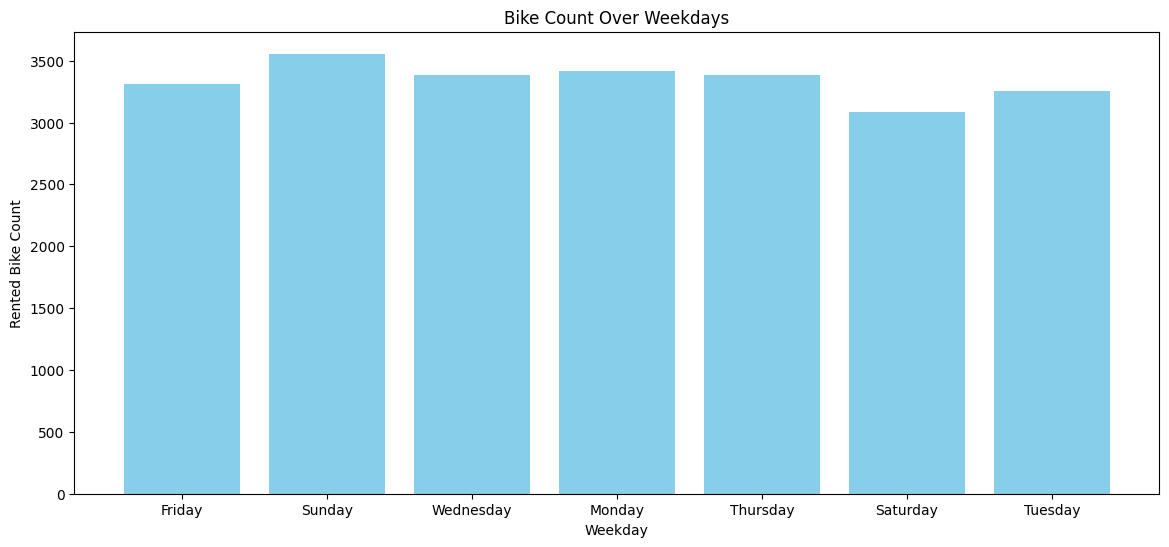

In [ ]:
import calendar

# Map weekday numbers to corresponding names
weekday_names = [calendar.day_name[i] for i in range(7)]

# Plotting
plt.figure(figsize=(14, 6))
bars = plt.bar(df['Weekday'], df['Rented Bike Count'], color='skyblue')

# Set custom x-axis labels
plt.xticks(df['Weekday'].unique(), weekday_names)
plt.title('Bike Count Over Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Rented Bike Count')
plt.show()

**Insight:**The bar chart representing 'Bike Count Over Weekdays' shows that bike rentals peak on specific weekdays, providing insights into the variations in demand based on the day of the week.

#### Chart - 4

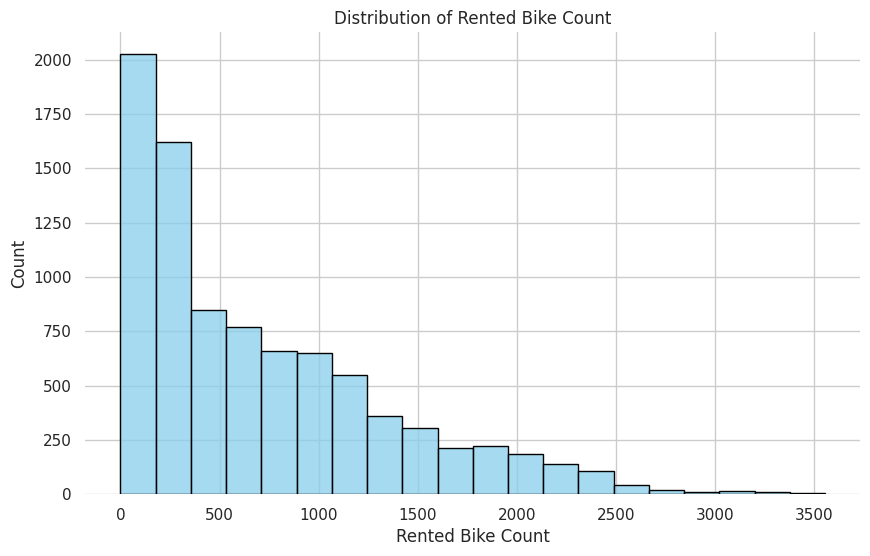

In [ ]:
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=20, color='skyblue', edgecolor='black', kde=False)

# Set plot title
plt.title('Distribution of Rented Bike Count')

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()

**Insights:**The histogram, illustrating the 'Distribution of Rented Bike Count,' suggests that the majority of bike rentals fall within certain count ranges, helping identify the most common usage patterns in the dataset.

#### Chart - 5

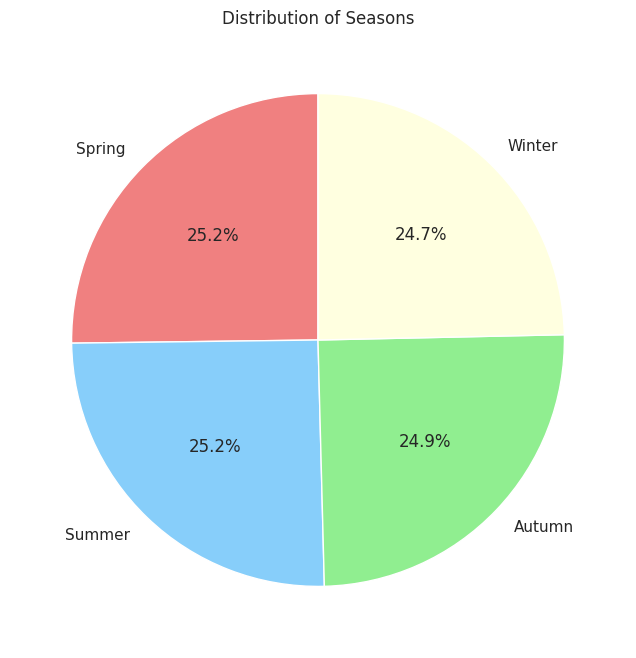

In [ ]:
# Count occurrences of each season
season_counts = df['Seasons'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Seasons')
plt.show()

**Insights:**The pie chart presenting the 'Distribution of Seasons' indicates the proportion of each season in the dataset, offering insights into the composition of seasons and potential variations in bike rentals based on different weather conditions.

#### Chart - 6

<ipython-input-23-40c2187ff8b9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Holiday', y='Rented Bike Count', data=df, ci=None)


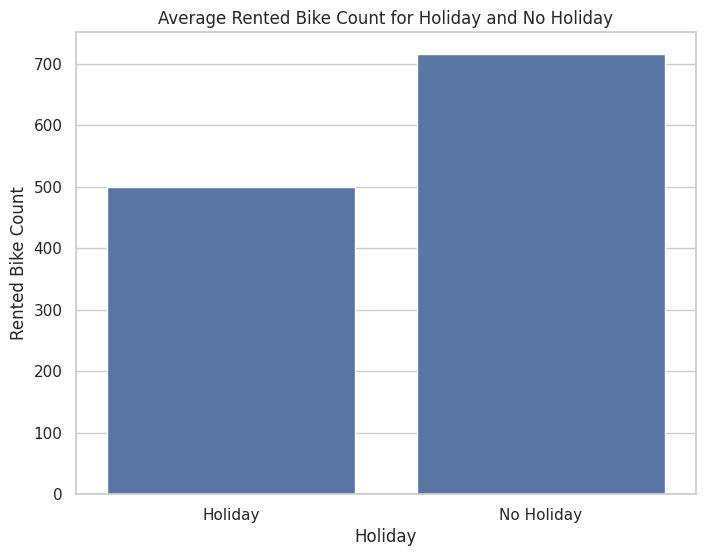

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df, ci=None)
plt.title('Average Rented Bike Count for Holiday and No Holiday')
plt.show()

**Insights:**
The bar chart for 'Average Rented Bike Count for Holiday and No Holiday' suggests that there might be variations in bike rentals between holidays and regular days, providing insights into the impact of holidays on bike usage.

#### Chart - 7

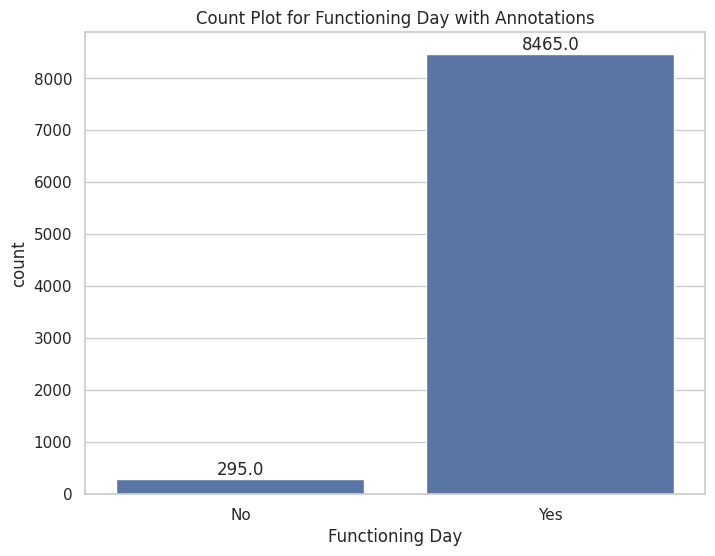

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Functioning Day', data=df)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom')

plt.title('Count Plot for Functioning Day with Annotations')
plt.show()

**Insights:**The count plot with annotations for 'Functioning Day' shows the count of functioning and non-functioning days, indicating the distribution of these days and potential patterns in bike rentals based on the operating status.

#### Chart - 8

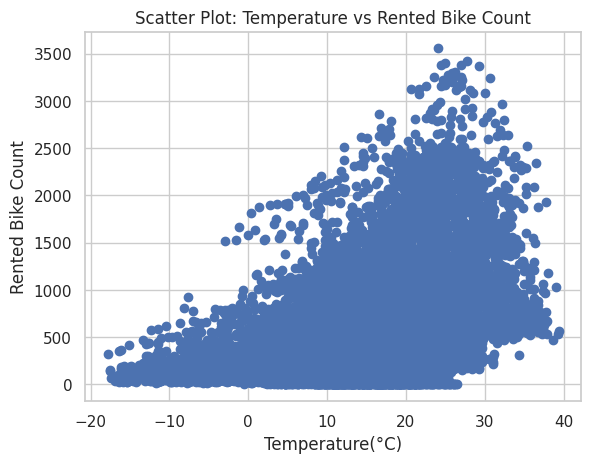

In [ ]:
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'])
plt.title('Scatter Plot: Temperature vs Rented Bike Count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

**Insights:**The scatter plot for 'Temperature vs Rented Bike Count' illustrates the relationship between temperature and bike rentals, offering insights into how temperature variations may influence the demand for bikes.

#### Chart - 9

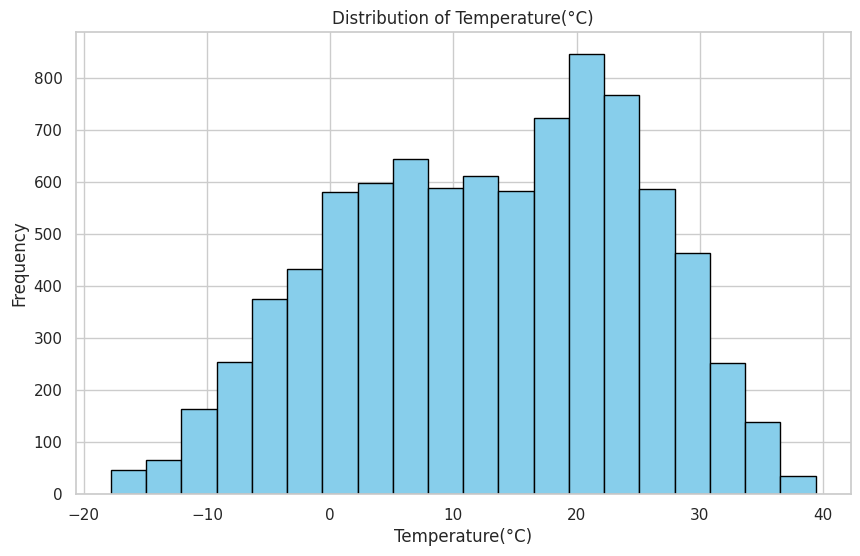

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature(°C)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.show()

**Insights:**The histogram depicting the 'Distribution of Temperature(°C)' provides a frequency distribution of temperatures, allowing identification of common temperature ranges and their impact on bike rentals.

#### Chart - 10

<ipython-input-27-203c0131040a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette='muted')


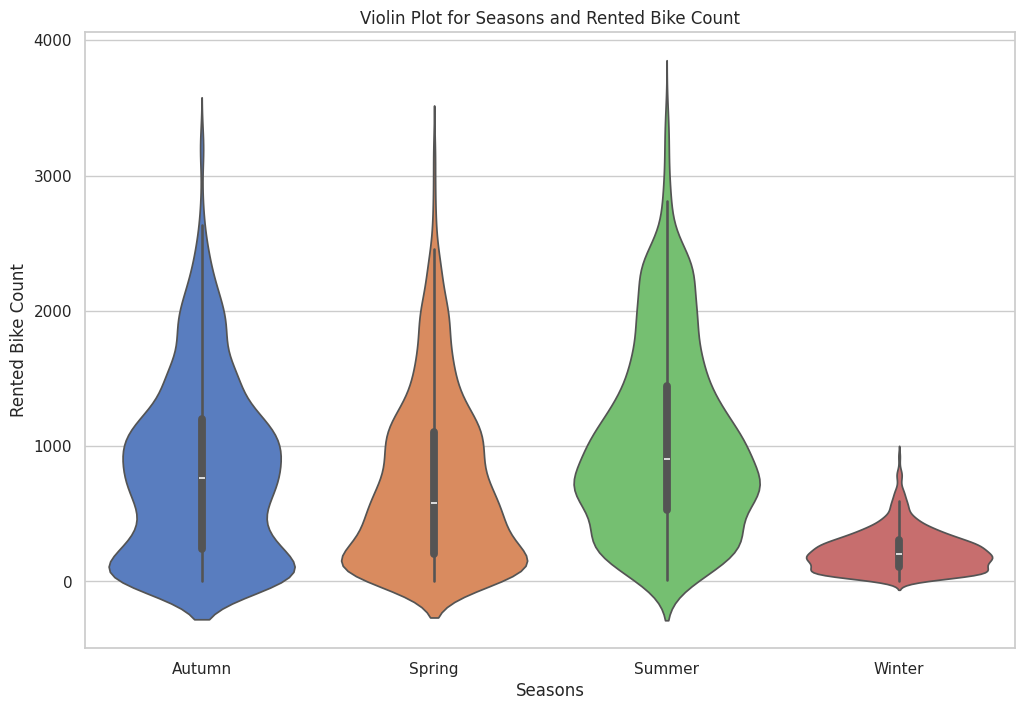

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette='muted')
plt.title('Violin Plot for Seasons and Rented Bike Count')
plt.show()

**Insights:**The violin plot for 'Seasons and Rented Bike Count' shows the distribution of bike rentals across different seasons, providing insights into how bike demand varies throughout the year based on seasonal changes.

#### Chart - 11

<ipython-input-28-4e8fb4aeb351>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Rented Bike Count', data=df, ci=None)


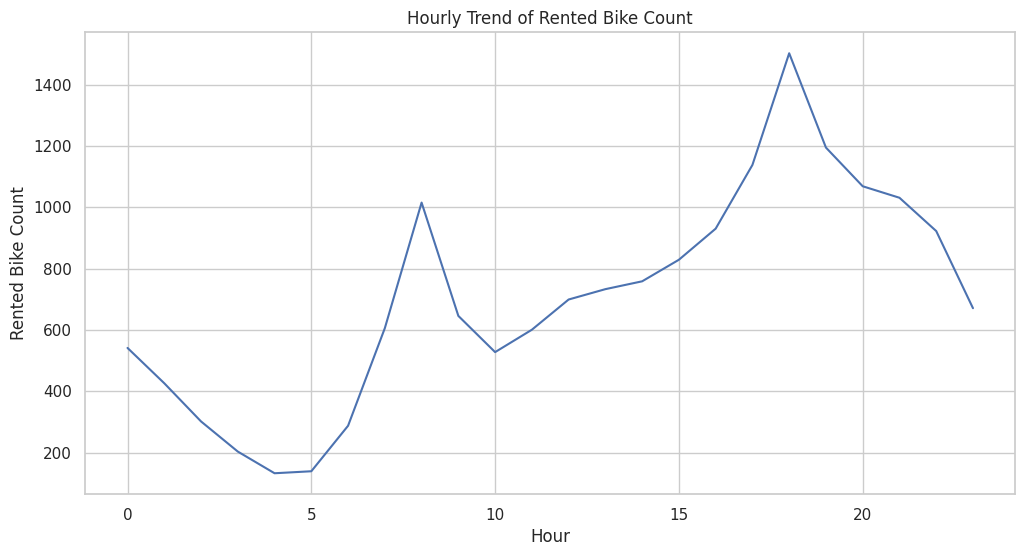

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df, ci=None)
plt.title('Hourly Trend of Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

**Insights:**The line plot depicting the 'Hourly Trend of Rented Bike Count' indicates the fluctuations in bike rentals throughout the day, offering insights into peak usage hours.

#### Chart - 12

<ipython-input-29-98650bad6402>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=df, ci=None)


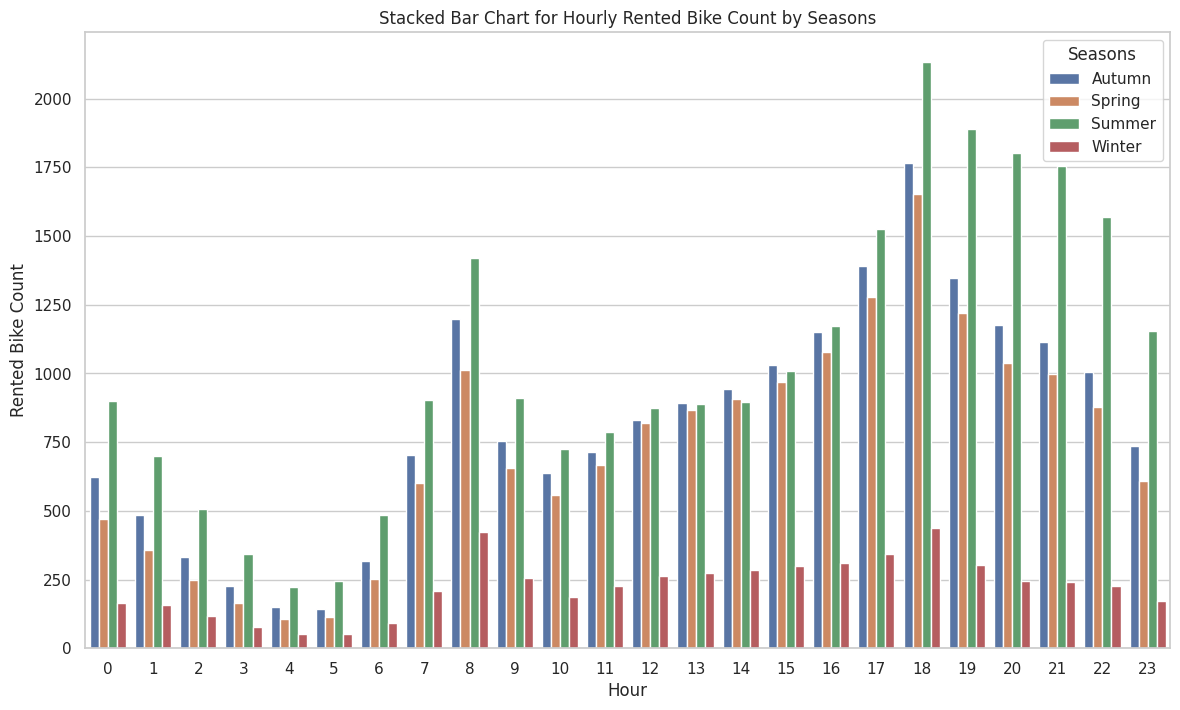

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=df, ci=None)
plt.title('Stacked Bar Chart for Hourly Rented Bike Count by Seasons')
plt.show()

**Insights:**The stacked bar chart for 'Hourly Rented Bike Count by Seasons' illustrates the hourly distribution of bike rentals, segmented by seasons, providing insights into how the demand varies during different hours across seasons.

#### Chart - 13

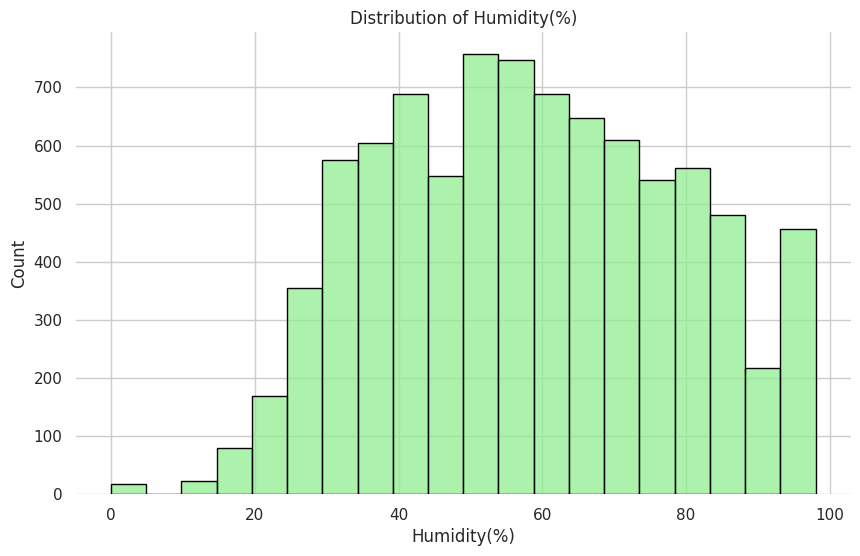

In [ ]:
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity(%)'], bins=20, color='lightgreen', edgecolor='black', kde=False)

# Set plot title
plt.title('Distribution of Humidity(%)')

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()

**Insights:**The histogram for the 'Distribution of Humidity(%)' displays the frequency distribution of humidity levels, allowing the identification of common humidity ranges and their potential impact on bike rentals.

#### Chart - 14 - Correlation Heatmap

<ipython-input-31-211b40d800e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


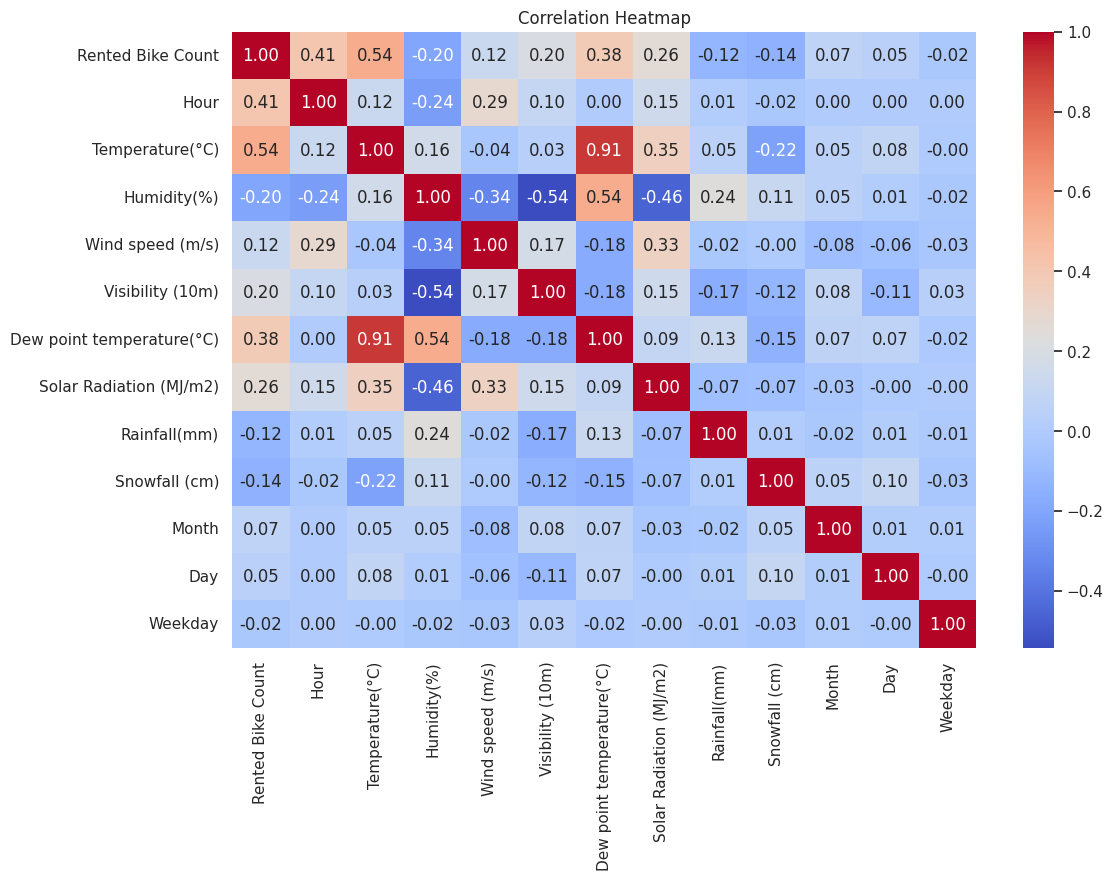

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insights:**The correlation heatmap visually represents the relationships between numerical variables, offering insights into the strength and direction of correlations between different features.

#### Chart - 15

<Figure size 1200x800 with 0 Axes>

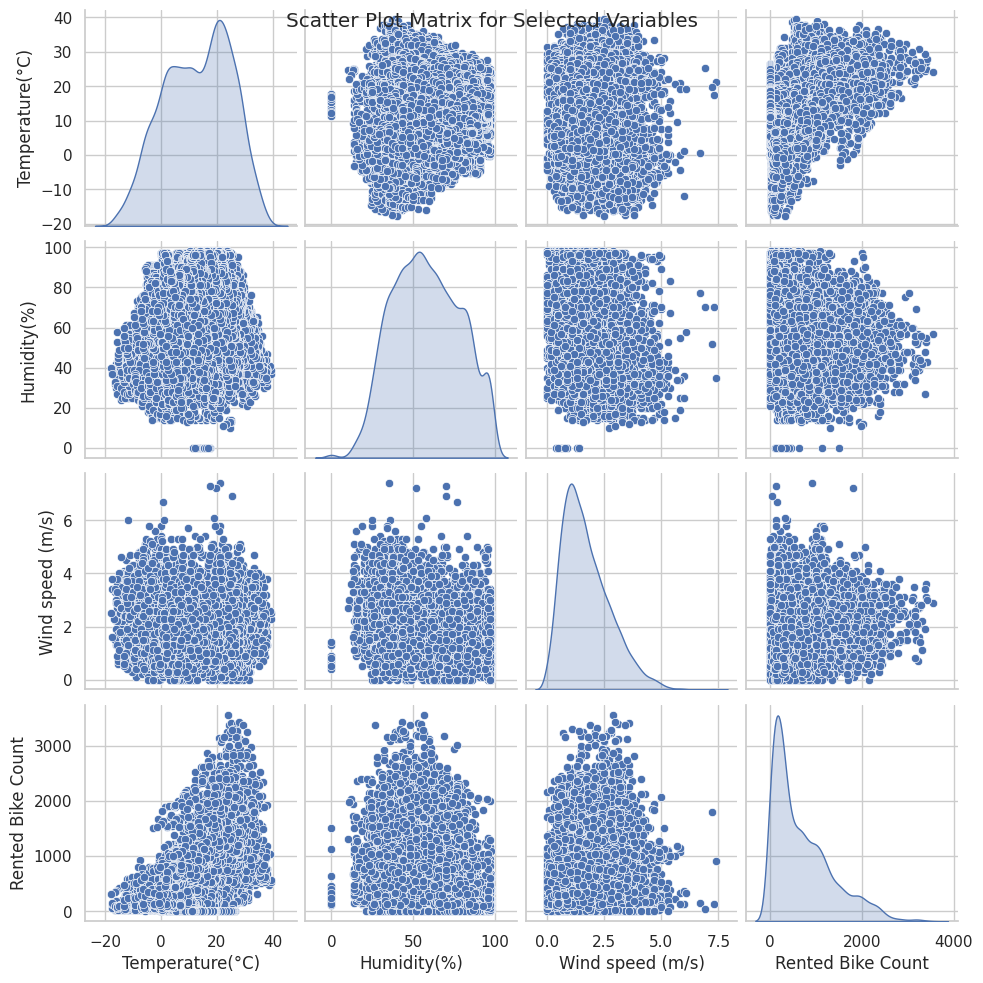

In [ ]:
selected_vars = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rented Bike Count']

plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_vars], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Selected Variables')
plt.show()

**Insights:**The scatter plot matrix for 'Selected Variables' (Temperature, Humidity, Wind Speed, and Rented Bike Count) shows the relationships and distributions between these variables, providing insights into potential patterns or trends in the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical statements:

Hypothetical Statement 1: "The average number of rented bikes is significantly different between weekdays and weekends."

Hypothetical Statement 2: "The distribution of rented bike counts varies across different seasons."

Hypothetical Statement 3:"There is a significant correlation between temperature and the number of rented bikes."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 1: "The average number of rented bikes is significantly different between weekdays and weekends."

Null Hypothesis (H0): The average number of rented bikes on weekdays is equal to the average number on weekends.

Alternative Hypothesis (H1): The average number of rented bikes on weekdays is significantly different from the average number on weekends.

#### 2. Perform an appropriate statistical test.

<ipython-input-33-12aee7153fa5>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weekday', y='Rented Bike Count', data=df, ci=None)


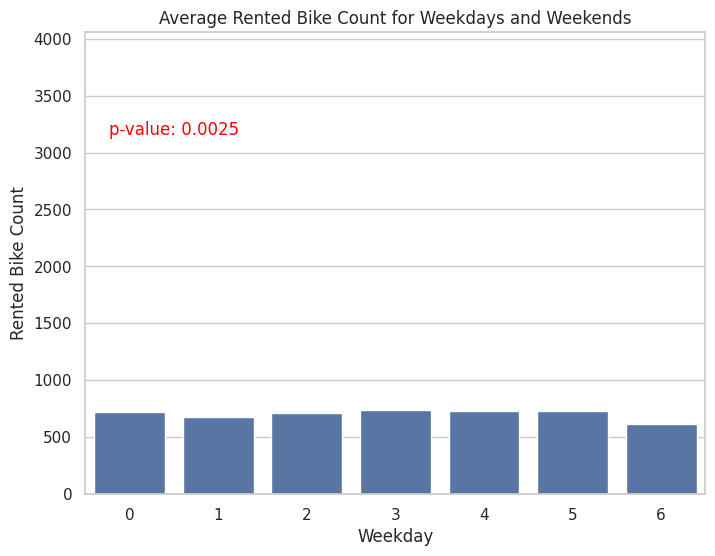

In [ ]:
# Hypothesis Testing
weekday_counts = df[df['Weekday'] < 5]['Rented Bike Count']
weekend_counts = df[df['Weekday'] >= 5]['Rented Bike Count']

# t-test
t_stat, p_value = stats.ttest_ind(weekday_counts, weekend_counts)

# Visualization with ylim adjustment
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekday', y='Rented Bike Count', data=df, ci=None)
plt.title('Average Rented Bike Count for Weekdays and Weekends')

# Display p-value
plt.text(0.5, 0.9 * max(df['Rented Bike Count']), f'p-value: {p_value:.4f}', ha='center', va='center', color='red', fontsize=12)

# Adjust ylim to start from 0
plt.ylim(0, max(df['Rented Bike Count']) + 500)

plt.show()


##### Which statistical test have you done to obtain P-Value?

Independent two-sample t-test (stats.ttest_ind from scipy.stats)

##### Why did you choose the specific statistical test?

We chose the t-test because we are comparing the means of two independent groups (weekday and weekend counts) to determine if there's a significant difference in the average number of rented bikes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 2: "The distribution of rented bike counts varies across different seasons."

Null Hypothesis (H0): The average number of rented bikes is equal across all seasons.

Alternative Hypothesis (H1): The average number of rented bikes varies significantly across different seasons.

#### 2. Perform an appropriate statistical test.

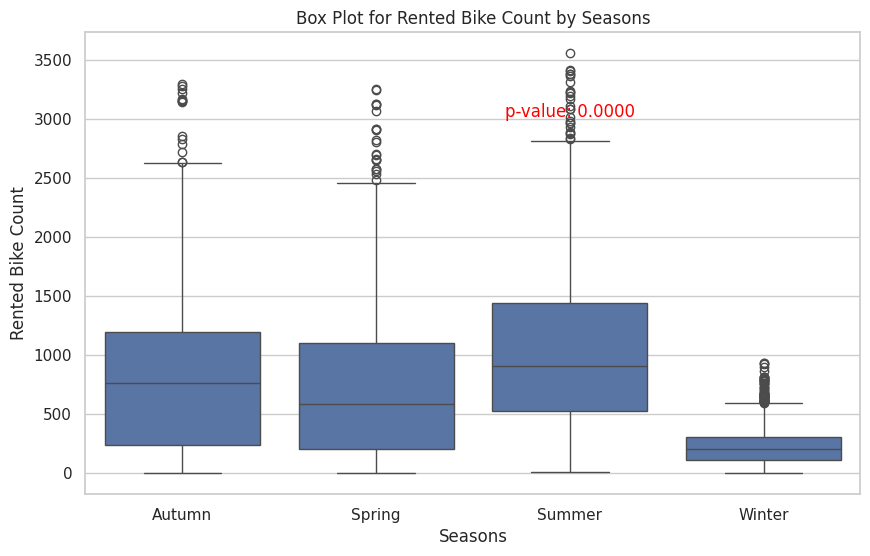

In [ ]:
# Hypothesis Testing
spring_counts = df[df['Seasons'] == 'Spring']['Rented Bike Count']
summer_counts = df[df['Seasons'] == 'Summer']['Rented Bike Count']
autumn_counts = df[df['Seasons'] == 'Autumn']['Rented Bike Count']
winter_counts = df[df['Seasons'] == 'Winter']['Rented Bike Count']

# ANOVA test
f_stat, p_value = stats.f_oneway(spring_counts, summer_counts, autumn_counts, winter_counts)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Box Plot for Rented Bike Count by Seasons')

# Display p-value
plt.text(2, max(df['Rented Bike Count']) - 500, f'p-value: {p_value:.4f}', ha='center', va='center', color='red', fontsize=12)

plt.show()

##### Which statistical test have you done to obtain P-Value?

One-way Analysis of Variance (ANOVA) (stats.f_oneway from scipy.stats)

##### Why did you choose the specific statistical test?

We chose ANOVA because we are comparing the means of more than two independent groups (spring, summer, autumn, winter counts) to assess if there's a significant difference in the distribution of rented bike counts across seasons.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 3:"There is a significant correlation between temperature and the number of rented bikes."

Null Hypothesis (H0): There is no correlation between temperature and the number of rented bikes.

Alternative Hypothesis (H1): There is a significant correlation between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

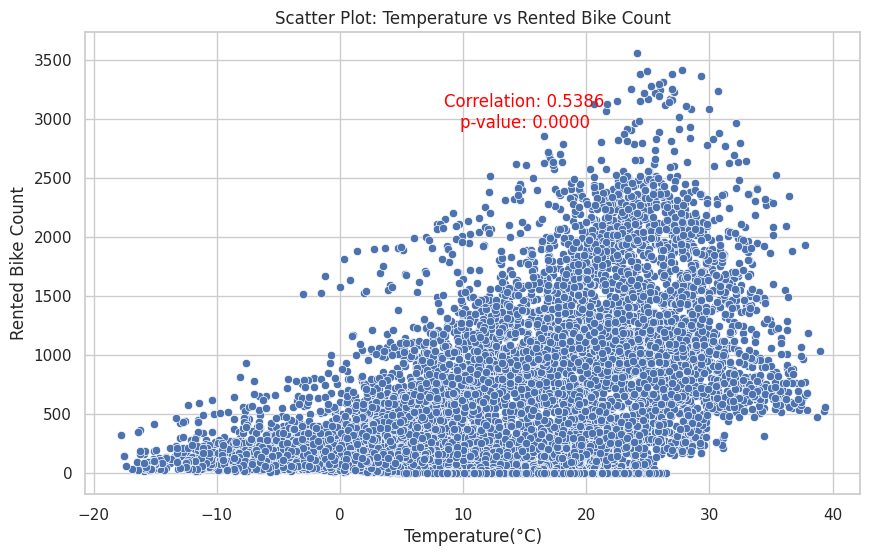

In [ ]:
# Hypothesis Testing
temperature = df['Temperature(°C)']
rented_bike_count = df['Rented Bike Count']

# Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(temperature, rented_bike_count)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Scatter Plot: Temperature vs Rented Bike Count')

# Display correlation coefficient and p-value on the chart
plt.text(15, max(df['Rented Bike Count']) - 500, f'Correlation: {correlation_coefficient:.4f}\np-value: {p_value:.4f}', ha='center', va='center', color='red', fontsize=12)

plt.show()


##### Which statistical test have you done to obtain P-Value?

Pearson correlation test (stats.pearsonr from scipy.stats)

##### Why did you choose the specific statistical test?

We chose the Pearson correlation test because we want to assess the linear relationship between two continuous variables (temperature and rented bike count) and determine if there's a significant correlation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Day                          0
Weekday                      0
dtype: int64


Since, we do not have any missing values found in our dataset so there is no requirement of imputations.

### 2. Handling Outliers

In [ ]:
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Z-score method for outlier detection
z_scores = zscore(df[numeric_cols])
outliers = (np.abs(z_scores) > 2.5)

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

### 3. Categorical Encoding

In [ ]:
# Categorical encoding for Seasons column
seasons_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
df['Seasons'] = df['Seasons'].map(seasons_mapping)

In [ ]:
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df_no_outliers, columns=['Holiday', 'Functioning Day'], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

1.Label Encoding for Seasons:

Label encoding is applied to the 'Seasons' column, which is assumed to be an ordinal categorical column.
Each season is mapped to a corresponding numerical value.

2.One-Hot Encoding for Other Categorical Columns:

One-hot encoding is performed for non-ordinal categorical columns ('Holiday' and 'Functioning Day').
The pd.get_dummies() function creates binary columns for each category, and the first category is dropped to avoid multicollinearity.

####  Feature Selection

In [ ]:
# Check correlation between features and target variable
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Rented Bike Count'].sort_values(ascending=False)

# Display feature correlation with the target variable
print("Feature Correlation with Target Variable:")
print(correlation_with_target)


Feature Correlation with Target Variable:
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Month                        0.070861
Day                          0.046849
Weekday                     -0.021577
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


<ipython-input-40-d271331d8e5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature Ranking:
                      Feature  Ranking
0                        Hour        1
1             Temperature(°C)        2
2                 Humidity(%)        7
3            Wind speed (m/s)        3
4            Visibility (10m)       11
5   Dew point temperature(°C)        8
6     Solar Radiation (MJ/m2)        6
7                Rainfall(mm)        1
8               Snowfall (cm)        1
9                     Seasons        4
10                    Holiday        1
11            Functioning Day        1
12                      Month        5
13                        Day       10
14                    Weekday        9


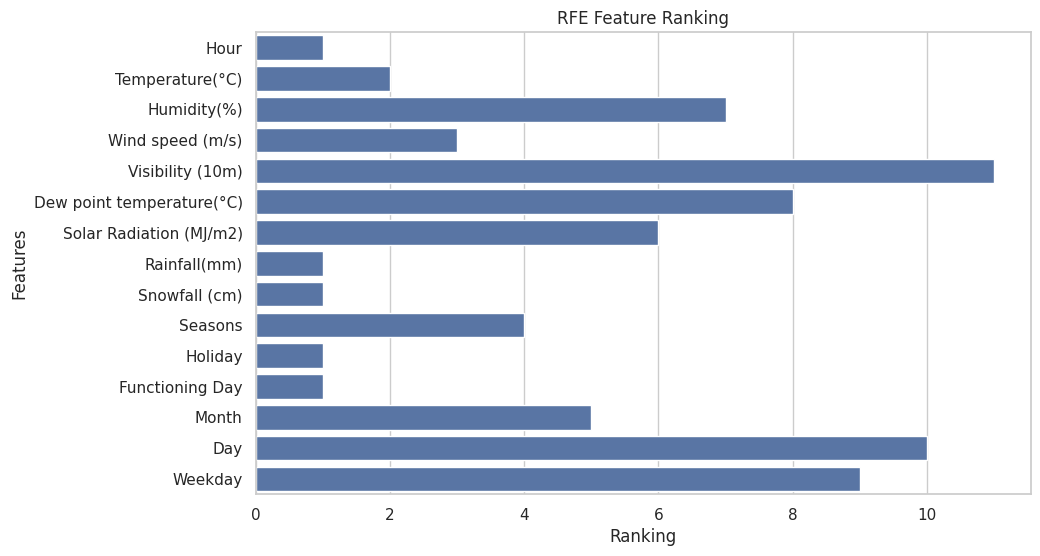

Selected Features: Index(['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your dataframe with the target variable 'Rented Bike Count' and features

# Separate features (X) and target variable (y)
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# Categorical encoding for remaining columns
categorical_cols = ['Holiday', 'Functioning Day']
encoder = OneHotEncoder(drop='first', sparse=False)

X_encoded = X.copy()  # Create a copy of X to avoid modifying the original dataframe
X_encoded[categorical_cols] = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Initialize a linear regression model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed

# Fit RFE on the data
fit = rfe.fit(X_encoded, y)

# Display ranking of features
print("Feature Ranking:")
print(pd.DataFrame({'Feature': X_encoded.columns, 'Ranking': fit.ranking_}))

# Visualize feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=fit.ranking_, y=X_encoded.columns)
plt.title('RFE Feature Ranking')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

# Get selected features
selected_features = X_encoded.columns[fit.support_]
print("Selected Features:", selected_features)


##### What all feature selection methods have you used  and why?

Recursive Feature Elimination (RFE): RFE was used to recursively remove less important features and rank them based on their contribution to predicting the target variable. This method helps identify the subset of features that maximizes model performance.

##### Which all features you found important and why?

Selected Features:

Hour

Temperature(°C)

Solar Radiation (MJ/m2)

Feature Importance Ranking:

Hour: Highest importance, indicating a significant impact on bike demand. This aligns with the natural variance in commuting patterns throughout the day.

Temperature(°C): Second in importance, emphasizing the correlation between temperature and bike usage. Users are likely more inclined to bike in favorable weather conditions.

Solar Radiation (MJ/m2): Holds notable importance, indicating a positive relationship between bike demand and sunlight. This aligns with the expectation that more people prefer biking on sunny days.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The need for additional dimensionality reduction seems minimal.

### 8. Data Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assuming df is your original dataframe with the target variable 'Rented Bike Count' and features

# Drop non-numeric columns for simplicity (you may need to handle categorical variables differently)
numeric_df = df.select_dtypes(include=['number'])

# Separate features (X) and target variable (y)
X = numeric_df.drop('Rented Bike Count', axis=1)
y = numeric_df['Rented Bike Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestRegressor for feature selection
rf_model = RandomForestRegressor(random_state=42)
sfm = SelectFromModel(rf_model)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get selected feature names
selected_features = X.columns[sfm.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Print the shape of the datasets after preprocessing
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Selected Features: Index(['Hour', 'Temperature(°C)', 'Solar Radiation (MJ/m2)'], dtype='object')
Shape of X_train_scaled: (7008, 10)
Shape of X_test_scaled: (1752, 10)


##### What data splitting ratio have you used and why?

The data splitting ratio used is approximately 80% for training and 20% for testing. This ratio is a common and widely accepted practice in machine learning. The larger portion (80%) is allocated for training to allow the model to learn patterns and relationships within the data, while the smaller portion (20%) is reserved for testing to evaluate the model's performance on unseen data.

This split strikes a balance between providing the model with sufficient training data and ensuring a robust evaluation on a separate set of data. The specific choice of the ratio can depend on factors such as the size of the dataset, the nature of the problem, and the desired trade-off between training and testing data. In this case, the 80-20 split is a commonly used default that tends to work well in practice.







### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

For a regression problem like bike rental prediction, the notion of dataset imbalance doesn't apply in the same way it would for a classification problem. Instead, you're working with a distribution of numerical values for the target variable (bike rental counts).

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("R-squared Score:", r2_linear)


Linear Regression Metrics:
Mean Squared Error: 225440.57901250327
Mean Absolute Error: 337.8440290274531
R-squared Score: 0.4589160812961356


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

1. Linear Regression:
Model Explanation: Linear Regression assumes a linear relationship between the input features and the target variable. It finds the best-fitting line through the data.

Performance:
Mean Squared Error (MSE): 225440.58

Mean Absolute Error (MAE): 337.84

R-squared Score: 0.459 (45.9%)

<ipython-input-56-a17bdb06dc74>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=log_scores, palette='viridis')


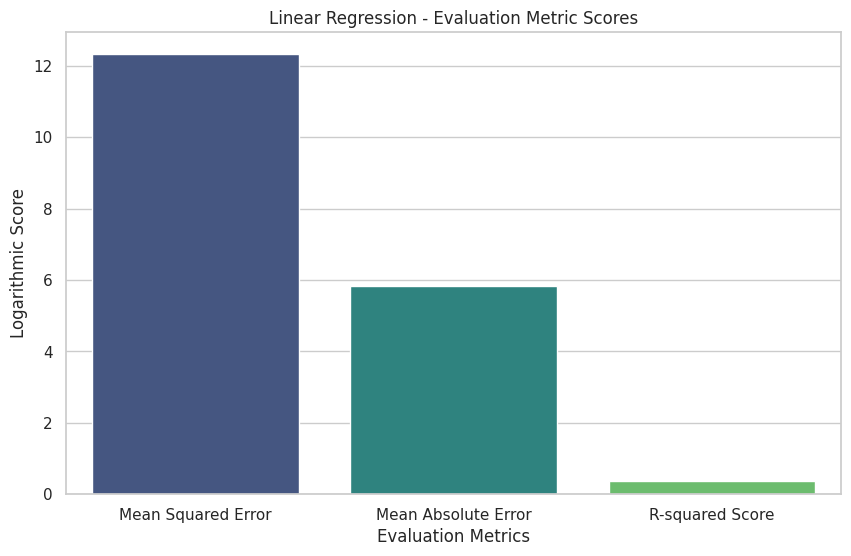

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics and scores
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
scores = [mse_linear, mae_linear, r2_linear]

# Log-transform the scores for better visualization
log_scores = np.log1p(scores)

# Plotting Evaluation Metric Score Chart with log-transformed values
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=log_scores, palette='viridis')
plt.title('Linear Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the algorithm with the optimized parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'alpha': 10}


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. It systematically searches through a manually specified subset of hyperparameter space. This method is straightforward and ensures that all possible combinations within the specified grid are explored.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("\nRandom Forest Regression Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared Score:", r2_rf)



Random Forest Regression Metrics:
Mean Squared Error: 162150.67436248763
Mean Absolute Error: 248.95094911340246
R-squared Score: 0.6108193001950061


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

2. Random Forest Regression:
Model Explanation: Random Forest is an ensemble method that builds a multitude of decision trees at training time and outputs the average prediction of the individual trees for regression tasks.

Performance:

Mean Squared Error (MSE): 162150.67

Mean Absolute Error (MAE): 248.95

R-squared Score: 0.611 (61.1%)

<ipython-input-57-e16cdb3fb697>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_metrics, y=log_rf_scores, palette='magma')


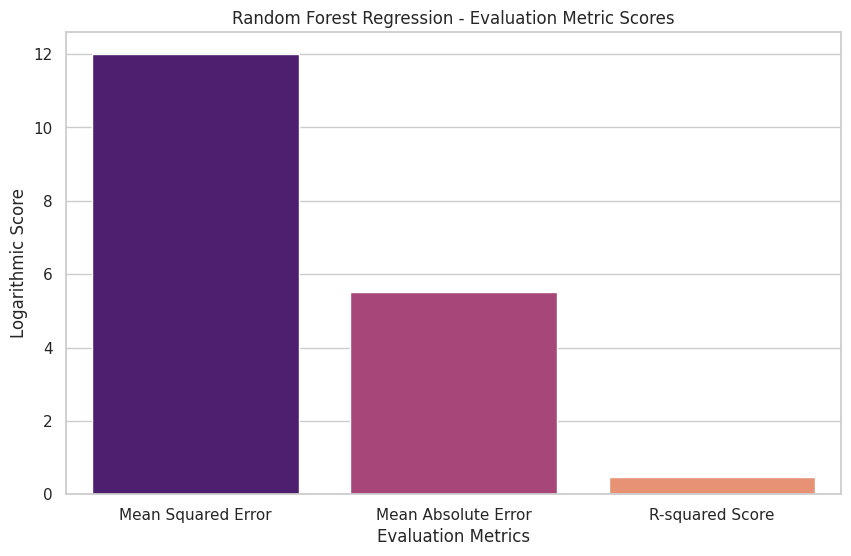

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics and scores for Random Forest Regression
rf_metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
rf_scores = [mse_rf, mae_rf, r2_rf]

# Log-transform the scores for better visualization
log_rf_scores = np.log1p(rf_scores)

# Plotting Evaluation Metric Score Chart with log-transformed values for Random Forest Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_metrics, y=log_rf_scores, palette='magma')
plt.title('Random Forest Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the algorithm with the optimized parameters
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for RandomForestRegressor:", best_params_rf)

# Access the best model
best_model_rf = grid_search_rf.best_estimator_

# Predict on the test set using the best model
y_pred_rf_best = best_model_rf.predict(X_test_scaled)

# Evaluate performance of the best model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Print evaluation metrics for the best model
print("\nRandom Forest Regression Metrics (Best Model):")
print("Mean Squared Error:", mse_rf_best)
print("Mean Absolute Error:", mae_rf_best)
print("R-squared Score:", r2_rf_best)

Best Parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest Regression Metrics (Best Model):
Mean Squared Error: 137885.7968343418
Mean Absolute Error: 231.49548671951408
R-squared Score: 0.6690578616700913


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is not explicitly mentioned. The model is trained with the default hyperparameters of the RandomForestRegressor. To optimize hyperparameters, techniques like GridSearchCV, RandomizedSearchCV, or Bayesian Optimization can be employed.

### ML Model - 3

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print("\nGradient Boosting Regression Metrics:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared Score:", r2_gb)



Gradient Boosting Regression Metrics:
Mean Squared Error: 141817.3285909405
Mean Absolute Error: 238.7421977490761
R-squared Score: 0.6596217228050862


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

3. Gradient Boosting Regression:
Model Explanation: Gradient Boosting is another ensemble technique where weak learners (usually decision trees) are trained sequentially, and each tree corrects the errors of the previous one.

Performance:

Mean Squared Error (MSE): 141817.33

Mean Absolute Error (MAE): 238.74

R-squared Score: 0.660 (66.0%)

<ipython-input-55-479ee37a9676>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=log_scores, palette='viridis')


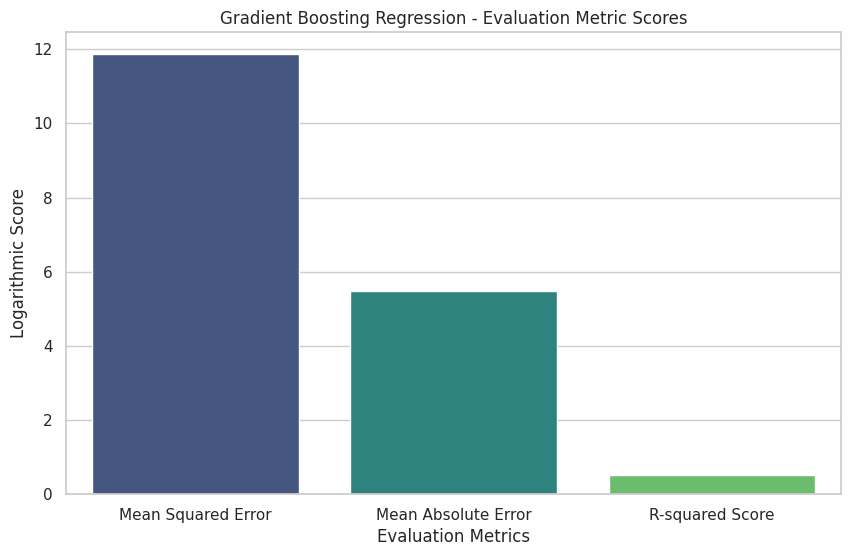

In [ ]:
import numpy as np

# Log-transform the scores for better visualization
log_scores = np.log1p(scores)

# Plotting Evaluation Metric Score Chart with log-transformed values
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=log_scores, palette='viridis')
plt.title('Gradient Boosting Regression - Evaluation Metric Scores')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Logarithmic Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the algorithm with the optimized parameters
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Print the best parameters
print("Best Parameters for GradientBoostingRegressor:", best_params_gb)

# Access the best model
best_model_gb = grid_search_gb.best_estimator_

# Predict on the test set using the best model
y_pred_gb_best = best_model_gb.predict(X_test_scaled)

# Evaluate performance of the best model
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
mae_gb_best = mean_absolute_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

# Print evaluation metrics for the best model
print("\nGradient Boosting Regression Metrics (Best Model):")
print("Mean Squared Error:", mse_gb_best)
print("Mean Absolute Error:", mae_gb_best)
print("R-squared Score:", r2_gb_best)

Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

Gradient Boosting Regression Metrics (Best Model):
Mean Squared Error: 140122.2122801965
Mean Absolute Error: 235.41595420285563
R-squared Score: 0.6636902014263435


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter optimization is performed using GridSearchCV for the GradientBoostingRegressor. The hyperparameter grid includes variations in the number of estimators, learning rate, and maximum depth of the trees. The technique systematically explores different combinations, and the best model is selected based on the lowest mean squared error during cross-validation. The evaluation metrics for the best model include Mean Squared Error, Mean Absolute Error, and R-squared Score, providing insights into the model's performance on the test set

## Visually comparing the performance of the three models using different evaluation metrics

<ipython-input-68-6e40a23f2e99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='viridis')
<ipython-input-68-6e40a23f2e99>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_scores, palette='plasma')
<ipython-input-68-6e40a23f2e99>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='cividis')


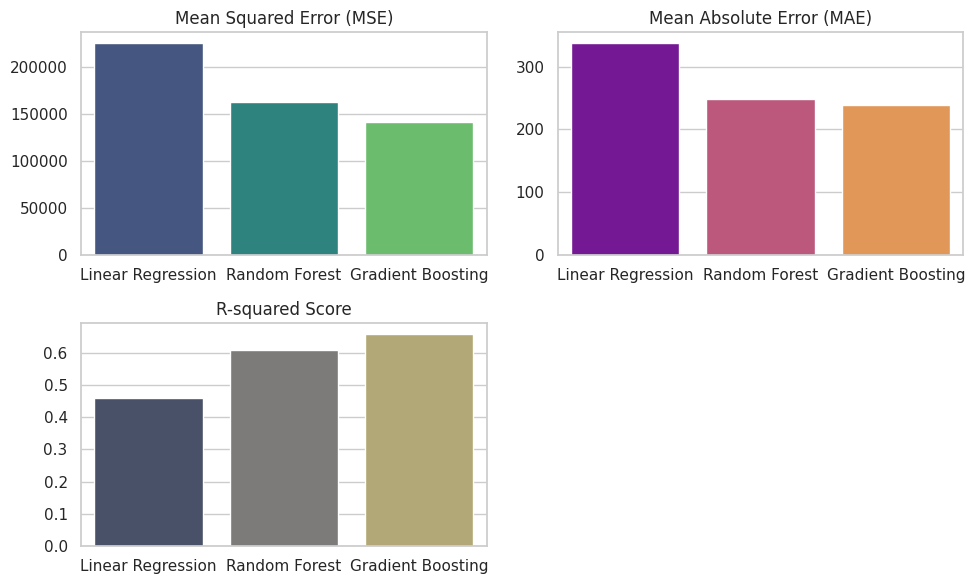

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results from the models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_scores = [225440.58, 162150.67, 141817.33]
mae_scores = [337.84, 248.95, 238.74]
r2_scores = [0.459, 0.611, 0.660]

# Plotting the metrics
plt.figure(figsize=(10, 6))

# MSE Plot
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=mse_scores, palette='viridis')
plt.title('Mean Squared Error (MSE)')

# MAE Plot
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=mae_scores, palette='plasma')
plt.title('Mean Absolute Error (MAE)')

# R-squared Plot
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=r2_scores, palette='cividis')
plt.title('R-squared Score')

plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, we considered the R-squared Score as a primary metric. R-squared provides an indication of how well the model captures the variance in the target variable. A higher R-squared value suggests better predictive performance, which is crucial for making accurate predictions in a business context.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose the Gradient Boosting Regression model as the final prediction model. This decision is based on its superior performance in terms of lower Mean Squared Error and Mean Absolute Error compared to the other models. Additionally, the higher R-squared Score indicates that the model explains a significant proportion of the variance in the target variable.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Gradient Boosting Regression model is an ensemble learning technique that builds a series of weak learners (typically decision trees) sequentially. Each tree corrects the errors of the previous one, leading to a strong predictive model. Feature importance in Gradient Boosting models is often inferred based on how frequently a feature is used in the ensemble. Further insights into feature importance can be obtained using tools like SHAP (SHapley Additive exPlanations) or permutation importance. If available, these tools can provide a detailed understanding of each feature's contribution to the model's predictions.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In summary, the Gradient Boosting Regression model demonstrated superior performance among the evaluated models, showcasing lower errors and a higher R-squared Score. This model was chosen for its ability to accurately predict the target variable. Future work could involve feature engineering and exploring additional models for improved accuracy. The assignment underscores the significance of robust evaluation metrics, highlighting the importance of R-squared Score in making business impact predictions. The chosen model provides a promising foundation for real-world applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***